In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
def clean(df,year):
    col_renames = ['Employment','Country','Education',
                   'Major','DeveloperType','JobSatisfaction','Salary',
                   'LanguageWorkedWith','DatabaseWorkedWith',
                   'PlatformWorkedWith','WebFrameWorkedWith']
    df.columns = col_renames
    
    is_freelance_or_fulltime = df['Employment'].str.contains('freelance',na=False)
    df = df.loc[is_freelance_or_fulltime]
    
    if ~isinstance(df['JobSatisfaction'],str):
        jobSat_buckets = {0: 'Extremely dissatisfied',
                  1: 'Moderately dissatisfied',
                  2: 'Moderately dissatisfied',
                  3: 'Slightly dissatisfied',
                  4: 'Slightly dissatisfied',
                  5: 'Neither satisfied nor dissatisfied',
                  6: 'Slightly satisfied',
                  7: 'Slightly satisfied',
                  8: 'Moderately dissatisfied',
                  9: 'Moderately dissatisfied',
                  10: 'Extremely satisfied'}
        df['JobSatisfaction'] = df['JobSatisfaction'].map(jobSat_buckets)
        
    country_dict = {'United States':'U.S.',
                    'United Kingdom':'U.K.',
                    'Russian Federation':'Russia'}
    df['Country'] = df['Country'].replace(country_dict)
    
    df['Salary'] = df['Salary'].astype(str)
    df['Salary'] = df['Salary'].str.replace(',','')    
    df['Salary'] = df['Salary'].astype(float)
    
    df['Year']=year
    
    return df

def explode_variable(series,col):
    series = series.dropna()
    series = series.str.split(';')
    series = series.explode()
    series = series.str.strip()
    if 'DeveloperType'==col:
        devtype_dict = {'Developer, full-stack':'Full-stack developer',
                        'Developer, back-end':'Back-end developer',
                        'Developer, front-end':'Front-end developer',
                        'Developer, mobile':'Mobile developer'}
        series = series.replace(devtype_dict)
    if 'WebFrameWorkedWith'==col:
        web_dict = {'React':'React.js',
                    'Angular/Angular.js':'Angular.js',
                    'Angular':'Angular.js'}
        series = series.replace(web_dict)
    return series

In [26]:
df_2017 = pd.read_csv('survey_results_public_2017.csv',low_memory=False)
cols_2017 = ['EmploymentStatus','Country','FormalEducation','MajorUndergrad',
             'DeveloperType','JobSatisfaction','Salary',
             'HaveWorkedLanguage','HaveWorkedDatabase','HaveWorkedPlatform','HaveWorkedFramework',
            ]
df_2017 = df_2017[cols_2017]
df_2017 = clean(df_2017,2017)

df_2018 = pd.read_csv('survey_results_public_2018.csv',low_memory=False)
cols_2018 = ['Employment','Country','FormalEducation','UndergradMajor',
             'DevType','JobSatisfaction','Salary',
             'LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','FrameworkWorkedWith'
            ]
df_2018 = df_2018[cols_2018]
df_2018 = clean(df_2018,2018)

df_2019 = pd.read_csv('survey_results_public_2019.csv',low_memory=False)

cols_2019 = ['Employment','Country','EdLevel','UndergradMajor',
             'DevType','JobSat','CompTotal',
             'LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith'
            ]
df_2019 = df_2019[cols_2019]
df_2019 = clean(df_2019,2019)

In [28]:
df_free = pd.concat([df_2017,df_2018,df_2019],axis=0,ignore_index=True)
print(df_free.shape)
df_free.head()

(23026, 12)


,Employment,Country,Education,Major,DeveloperType,JobSatisfaction,Salary,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,Year
0,"Independent contractor, freelancer, or self-em...",France,Master's degree,Computer science or software engineering,Mobile developer; Desktop applications developer,Moderately dissatisfied,NaN,Objective-C; Swift,PostgreSQL,iOS; Amazon Web Services (AWS),NaN,2017
1,"Independent contractor, freelancer, or self-em...",U.S.,Primary/elementary school,NaN,Desktop applications developer,Moderately dissatisfied,NaN,JavaScript; VB.NET,NaN,Windows Desktop,NaN,2017
2,"Independent contractor, freelancer, or self-em...",Italy,Secondary school,NaN,Web developer,Moderately dissatisfied,NaN,PHP; SQL,MySQL,Windows Desktop; WordPress,NaN,2017
3,"Independent contractor, freelancer, or self-em...",Germany,Professional degree,Computer science or software engineering,NaN,NaN,NaN,C#; Java,NaN,Windows Desktop; Linux Desktop,NaN,2017
4,"Independent contractor, freelancer, or self-em...",Brazil,Some college/university study without earning ...,Computer science or software engineering,Web developer,Neither satisfied nor dissatisfied,NaN,JavaScript,MongoDB,NaN,Node.js; React; Firebase,2017


## Country Statististics

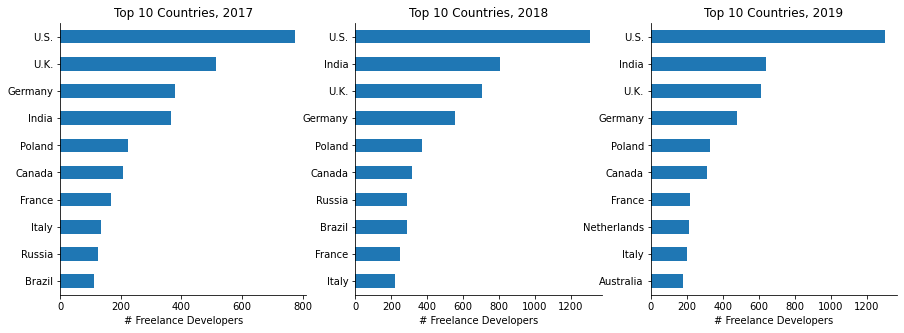

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

In [30]:
fig, ax = plt.subplots(1,3,figsize=(15,5));

i = 0
for year in [2017,2018,2019]:
    plt.figure(figsize=(3,5))
    df_year = df_free[df_free['Year']==year]
    df_year['Country'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh',ax=ax[i])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlabel('# Freelance Developers')
    ax[i].set_title('Top 10 Countries, '+str(year));
    i+=1
plt.show();

## Developer Type Statistics

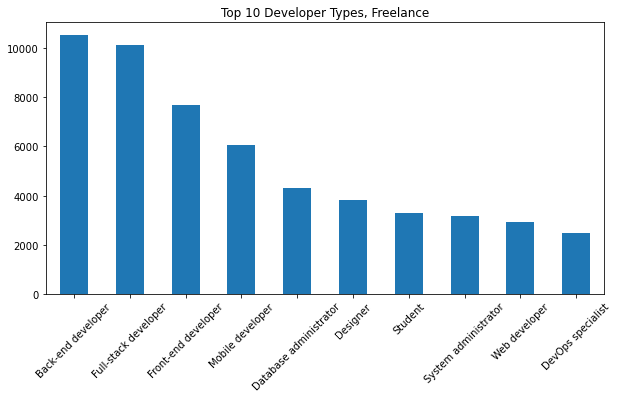

In [31]:
plt.figure(figsize=(10,5))
series = explode_variable(df_free['DeveloperType'],'DeveloperType')
series.value_counts().head(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Developer Types, Freelance')
plt.xticks(rotation=45)
plt.show()

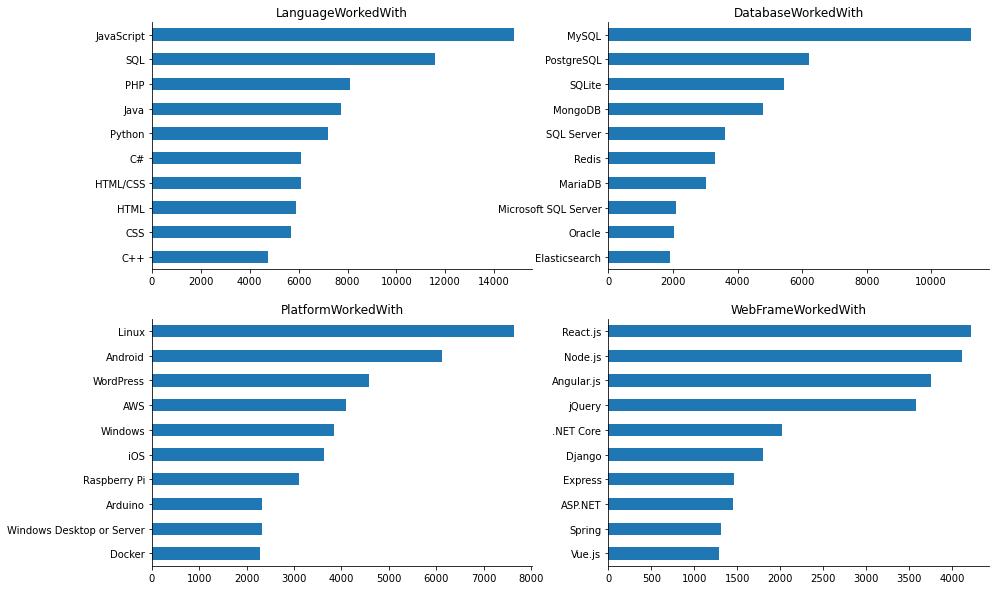

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

In [32]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

a = 0
b = 0

for col in ['LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith']:
    plt.figure(figsize=(3,5))
    series = explode_variable(df_free[col],col)
    series.value_counts().head(10).sort_values().plot(kind='barh',ax=ax[a,b])
    ax[a,b].spines['right'].set_visible(False)
    ax[a,b].spines['top'].set_visible(False)
    ax[a,b].set_title(str(col));
    b+=1
    if(b==2):
        b=0
        a+=1
plt.show();